# 한글설정

In [ ]:
# 한글설정
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

# 교통량과 대기오염시각화
- 자동차 매연과 대기오염(미세먼지, 초미세먼지)의 관계 시각화를 통해서 확인
  - 매연 정보는 교통량을 통해서 확인
    - 즉, 교통량이 많을수록 매연도 많아질 것으로 가정

- 강남구 선릉역을 기준으로 `2021 07월` 한 달간의 데이터를 수집


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
rawData = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/대기오염정보/airTraffic.csv')

## 시계열 분석을 위한 준비

In [7]:
rawData['dateTime'] = rawData['날짜'] # 인덱싱할 날짜를 가지고 새로운 컬럼을 만듦
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0,07-01-01
1,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0,07-01-02
2,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0,07-01-03
3,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0,07-01-04
4,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0,07-01-05
...,...,...,...,...,...,...,...,...,...
739,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0,07-31-20
740,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0,07-31-21
741,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0,07-31-22
742,07-31-23,20.0,13.0,0.041,0.012,0.4,0.003,2270.0,07-31-23


dateTime 컬럼을 `날짜`타입으로 변경
  - 현재 날짜 타입은 `pandas`날짜-시간 타입과 맞지 않아서 변환이 안됨

In [9]:
# 원래는 이렇게 바뀜
pd.to_datetime('07-31-00', format='%m-%d-%H')

Timestamp('1900-07-31 00:00:00')

In [ ]:
pd.to_datetime( rawData['dateTime'] , format='%m-%d-%H')  
# dateTime컬럼을 날짜형식으로 바꿈 그냥하면 '년-월-일'으로만 바뀌기 때문에 때문에 
# format을 통해 형식을 지정해줘야함  → 월-일-시로 할거임 
# 현재 날짜 타입은 `pandas`날짜-시간 타입과 맞지 않아서 변환이 안됨
# ( pandas는 00-23시  내가 가진 데이터는 01- 24시이기 때문에 24시는 처리하지 못해서 변환이 불가능한 것)

apply를 이용해서 날짜를 변경

In [10]:
def setDateTime(row) :  # 여기서 row가 Series 타입으로 넘어감
  month, day, hour = row['dateTime'].split('-')
  #hour = '{:02}'.format(int(hour)-1)
  hour = f'{int(hour)-1:02}'
  return pd.to_datetime('-'.join( ['2021',month, day, hour] ), format='%Y-%m-%d-%H' )

rawData.apply( lambda x: setDateTime(x), axis=1 )

0     2021-07-01 00:00:00
1     2021-07-01 01:00:00
2     2021-07-01 02:00:00
3     2021-07-01 03:00:00
4     2021-07-01 04:00:00
              ...        
739   2021-07-31 19:00:00
740   2021-07-31 20:00:00
741   2021-07-31 21:00:00
742   2021-07-31 22:00:00
743   2021-07-31 23:00:00
Length: 744, dtype: datetime64[ns]

for loop를 이용해서 날짜 변경

In [ ]:
# 내가 한 방법
for i in range(len(rawData)) :
  row = rawData['dateTime'][i]
  m, d, h = row[:2],  row[3:5],   int(row[-2:]) - 1
  rawData['dateTime'][i] = f'2021-{m}-{d}-{h:02}'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# 내가 한 방법 (시분초까지 나오도록)  
for i in range(len(rawData)) :
  row = rawData['dateTime'][i]
  m, d, h = row[:2],  row[3:5],   int(row[-2:]) - 1
  rawData['dateTime'][i] = pd.to_datetime(f'2021-{m}-{d}-{h:02}', format='%Y-%m-%d-%H')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# 내가 한 방법 - 수정
for row in rawData['dateTime']:
  m, d, h = row[:2],  row[3:5],   int(row[-2:]) - 1
  raw = f'2021-{m}-{d}-{h:02}'

In [ ]:
# 내가 한 방법 - 수정하는중 (시분초까지 보이도록)  왜 안돼
for row in rawData['dateTime']:
  m, d, h = row[:2],  row[3:5],   int(row[-2:]) - 1
  row = pd.to_datetime(f'2021-{m}-{d}-{h:02}', format='%Y-%m-%d-%H')

In [ ]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0,2021-07-01 00:00:00
1,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0,2021-07-01 01:00:00
2,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0,2021-07-01 02:00:00
3,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0,2021-07-01 03:00:00
4,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...
739,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0,2021-07-31 19:00:00
740,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0,2021-07-31 20:00:00
741,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0,2021-07-31 21:00:00
742,07-31-23,20.0,13.0,0.041,0.012,0.4,0.003,2270.0,2021-07-31 22:00:00


In [11]:
# 강사님이 한 방법
for index, row in rawData.iterrows():
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format(int(hour) - 1)
  # print( pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' ) )
  rawData.loc[ index, 'dateTime'] = pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' )

In [12]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0,2021-07-01 00:00:00
1,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0,2021-07-01 01:00:00
2,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0,2021-07-01 02:00:00
3,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0,2021-07-01 03:00:00
4,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...
739,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0,2021-07-31 19:00:00
740,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0,2021-07-31 20:00:00
741,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0,2021-07-31 21:00:00
742,07-31-23,20.0,13.0,0.041,0.012,0.4,0.003,2270.0,2021-07-31 22:00:00


시간 컬럼을 인덱스로 설정

In [14]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq=None)

In [15]:
rawData.columns

Index(['날짜', 'PM10', 'PM2.5', '오 존', '이산화질소', '일산화탄소', '아황산가스', 'vol'], dtype='object')

In [13]:
rawData.set_index('dateTime', inplace= True)  # 인덱스를 dateTime컬럼으로 지정
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-01 00:00:00,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0
2021-07-01 01:00:00,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0
2021-07-01 02:00:00,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0
2021-07-01 03:00:00,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0
2021-07-01 04:00:00,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0
2021-07-31 20:00:00,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0
2021-07-31 21:00:00,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0


추가 설정

In [ ]:
rawData.index   # freq(주기)를 설정

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq=None)

In [ ]:
rawData = rawData.asfreq('H')    # 주기를 시간단위로 맞춰줌 (asfreq는 inplace옵션이 없기 때문에 다시 저장)

In [ ]:
rawData.index    # 주기가 설정된 것을 확인  (freq='H')

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq='H')

## 시각화

### 결측치 확인

In [ ]:
import missingno

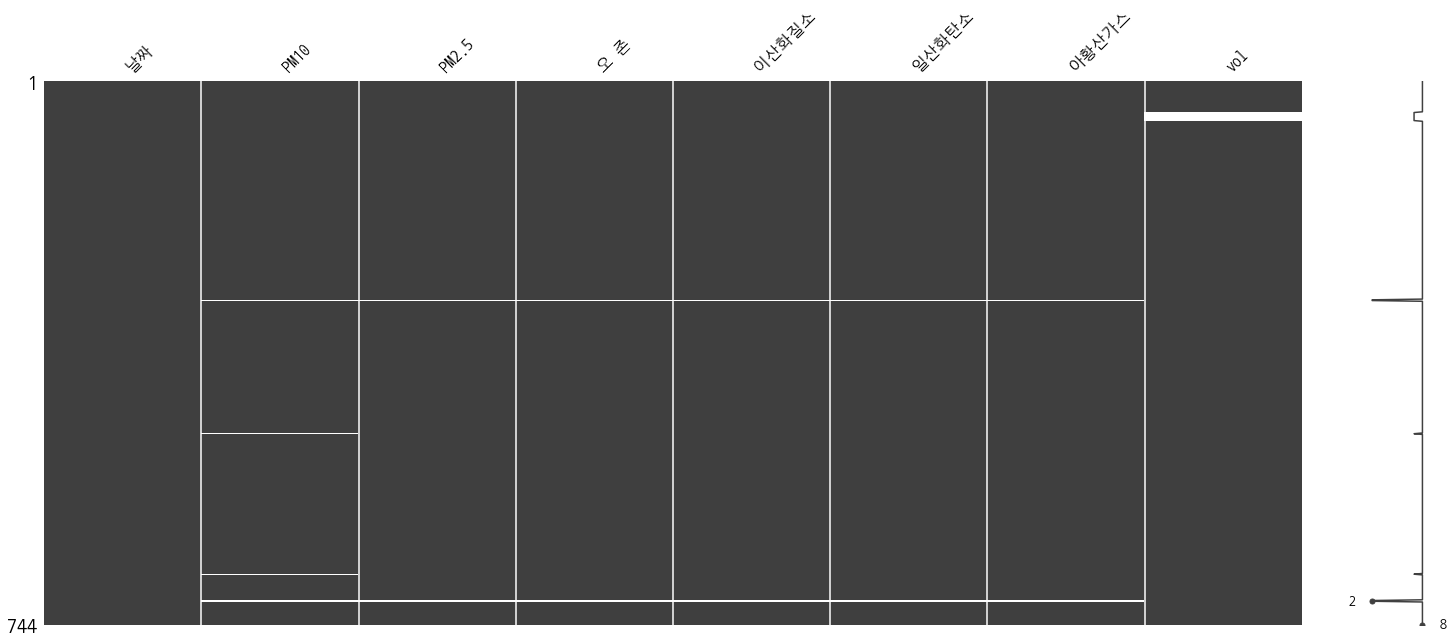

In [ ]:
missingno.matrix(rawData)

교통량 정보가 없는 데이터 확인

In [ ]:
rawData.loc[ rawData['vol'].isna() ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 19:00:00,07-02-20,27.0,18.0,0.036,0.027,0.4,0.003,NaN
2021-07-02 20:00:00,07-02-21,27.0,18.0,0.027,0.027,0.4,0.004,NaN
2021-07-02 21:00:00,07-02-22,22.0,14.0,0.023,0.024,0.4,0.003,NaN
2021-07-02 22:00:00,07-02-23,18.0,12.0,0.021,0.024,0.3,0.004,NaN
2021-07-02 23:00:00,07-02-24,18.0,12.0,0.022,0.020,0.3,0.003,NaN
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.025,0.015,0.3,0.003,NaN
2021-07-03 01:00:00,07-03-02,16.0,10.0,0.028,0.010,0.3,0.004,NaN
2021-07-03 02:00:00,07-03-03,17.0,11.0,0.028,0.009,0.3,0.003,NaN
2021-07-03 03:00:00,07-03-04,14.0,9.0,0.030,0.007,0.3,0.003,NaN


In [ ]:
from datetime import datetime
datetime(2021, 7, 1, hour=18)

datetime.datetime(2021, 7, 1, 18, 0)

In [ ]:
rawData.loc[[ datetime(2021, 7, 2, hour=18) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 18:00:00,07-02-19,27.0,18.0,0.037,0.032,0.5,0.003,2107.0


In [ ]:
rawData.loc[[ datetime(2021, 7, 3, hour=7) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-03 07:00:00,07-03-08,17.0,9.0,0.018,0.023,0.3,0.003,844.0


이전 시간 교통량으로 결측치를 채워보자 

In [ ]:
# rawData['vol_fill'] = rawData['vol'].fillna(method='ffill')   # 'ffill' 이전의 값으로 채워줌
rawData['vol_fill'] = rawData['vol'].fillna(method='bfill')  # 'bfill' 결측치 다음 값으로 채워줌

In [ ]:
rawData.loc[ datetime(2021, 7, 2, hour=18):datetime(2021, 7, 3, hour=7) ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-02 18:00:00,07-02-19,27.0,18.0,0.037,0.032,0.5,0.003,2107.0,2107.0
2021-07-02 19:00:00,07-02-20,27.0,18.0,0.036,0.027,0.4,0.003,NaN,844.0
2021-07-02 20:00:00,07-02-21,27.0,18.0,0.027,0.027,0.4,0.004,NaN,844.0
2021-07-02 21:00:00,07-02-22,22.0,14.0,0.023,0.024,0.4,0.003,NaN,844.0
2021-07-02 22:00:00,07-02-23,18.0,12.0,0.021,0.024,0.3,0.004,NaN,844.0
2021-07-02 23:00:00,07-02-24,18.0,12.0,0.022,0.020,0.3,0.003,NaN,844.0
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.025,0.015,0.3,0.003,NaN,844.0
2021-07-03 01:00:00,07-03-02,16.0,10.0,0.028,0.010,0.3,0.004,NaN,844.0
2021-07-03 02:00:00,07-03-03,17.0,11.0,0.028,0.009,0.3,0.003,NaN,844.0


대기오염 정보와 교통량이 없는 데이터에 대해서는 이전 시간의 값으로 채워주도록 했다.
→ 이런 방법은 시계열 데이터이기 때문에 가능
→ 다른 경우라면 다른 방법을 사용해야함

In [ ]:
rawData.fillna( method='ffill', inplace=True )

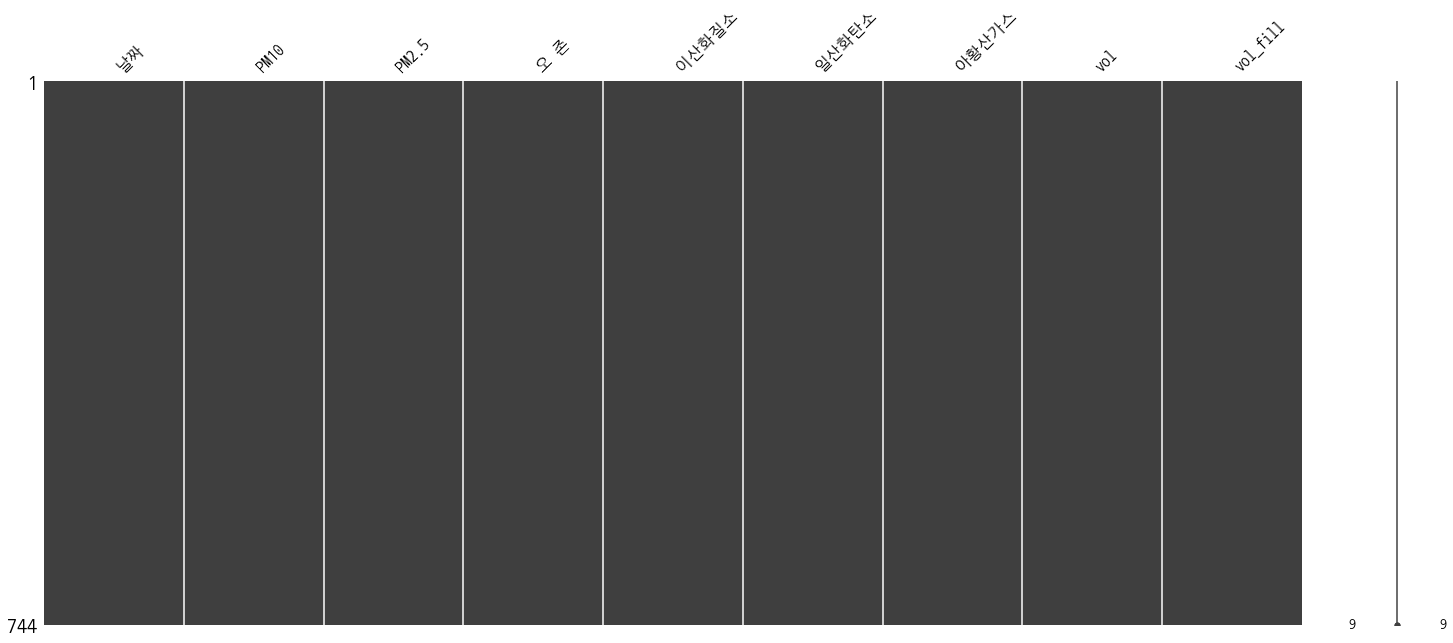

In [ ]:
missingno.matrix(rawData)

### 교통량 정보 확인

In [ ]:
rawData['vol'].unique()

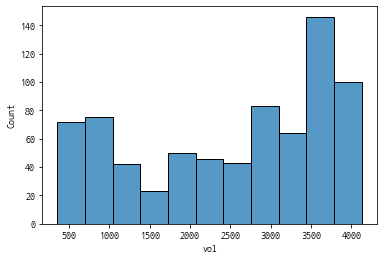

In [ ]:
sns.histplot( data = rawData, x='vol' )

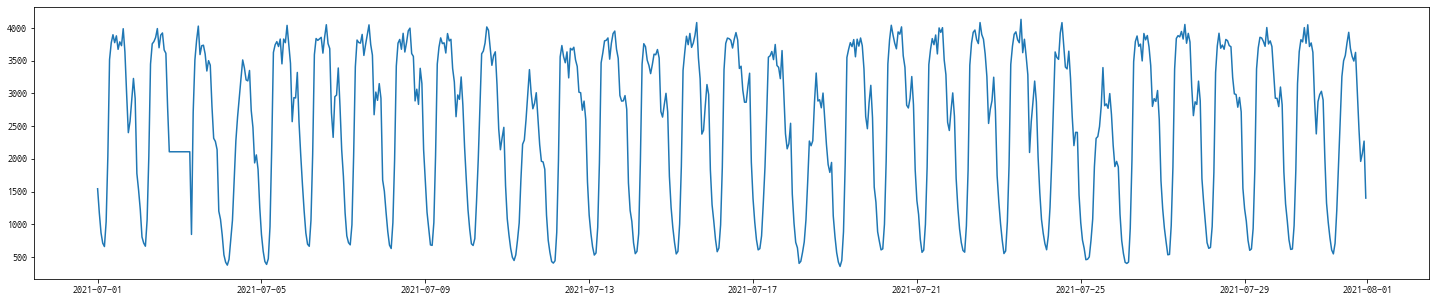

In [ ]:
plt.figure( figsize= (25,5) )
plt.plot( rawData['vol'] )

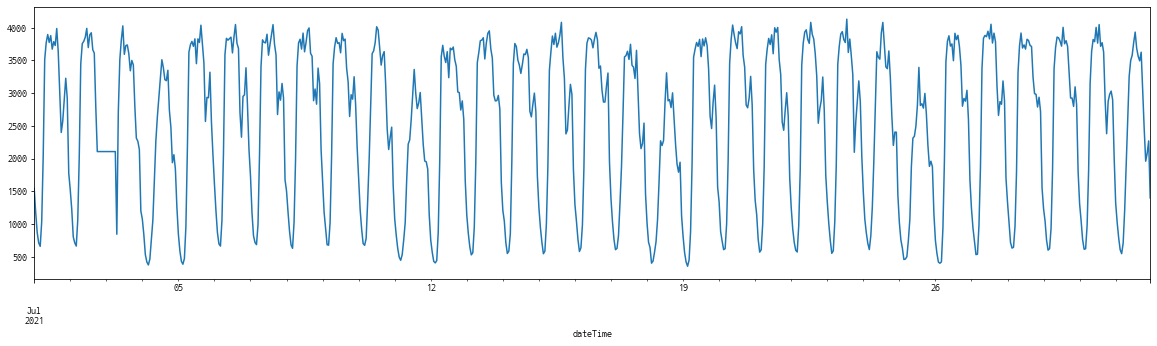

In [ ]:
rawData['vol'].plot(kind='line',figsize=(20,5))

### 미세먼지와 초미세먼지 확인

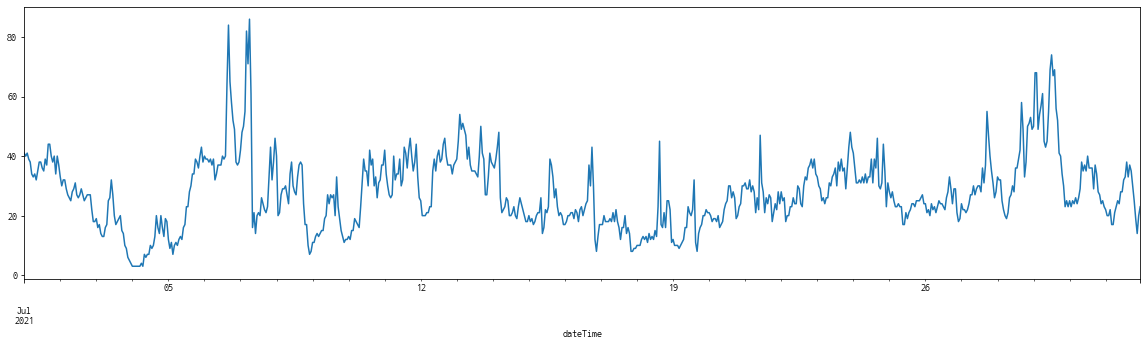

In [ ]:
rawData['PM10'].plot( kind = 'line', figsize=(20,5) )   # 미세먼지

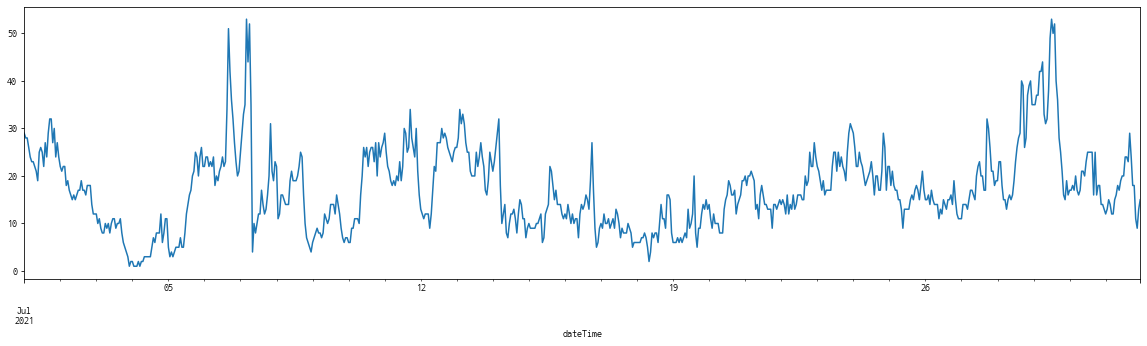

In [ ]:
rawData['PM2.5'].plot( kind = 'line', figsize=(20,5) )   # 초미세번지

### 교통량과 미세먼지의 관계
  - 어떤 그림을 그리면 확인이 제일 쉬울까?

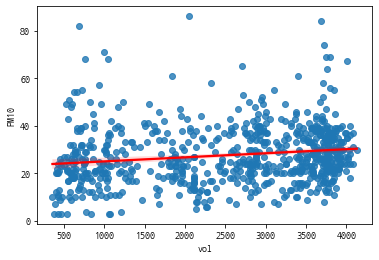

In [ ]:
sns.regplot(data=rawData, x='vol', y='PM10', line_kws={'color':'red'})  # 교통량과 미세먼지

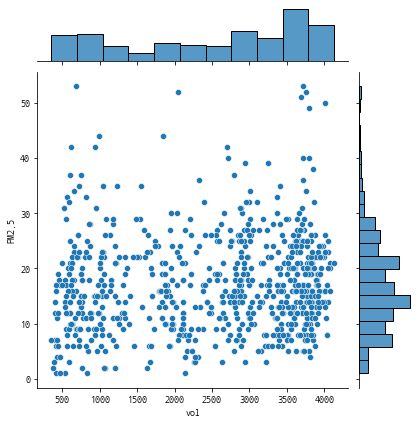

In [ ]:
sns.jointplot(data=rawData, x='vol', y='PM2.5')     # 교통량과 초미세먼지

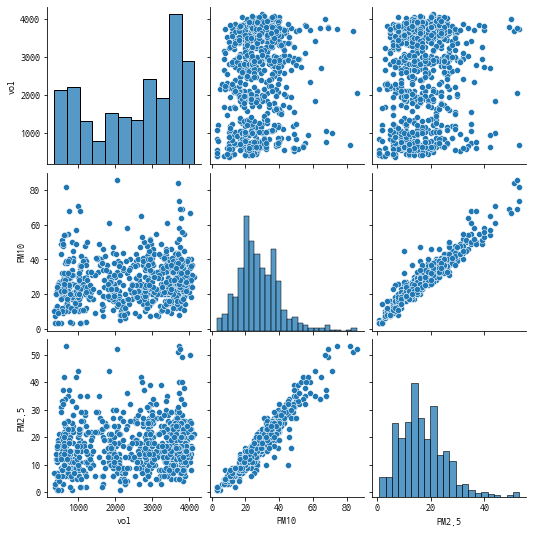

In [ ]:
sns.pairplot( rawData[['vol', 'PM10', 'PM2.5']] )

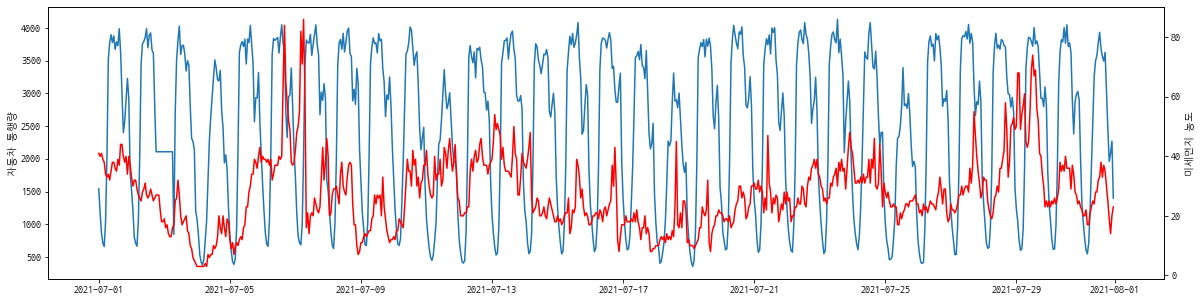

In [ ]:
plt.figure( figsize=(20,5) )
plt.plot( rawData['vol'])
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( rawData['PM10'], color= 'red' )
ax2.set_ylabel('미세먼지 농도')

plt.show()

## 누적 통행량
- 데이터는 다양한 확인이 필요하다
- 차량의 누적 통행량과 비교하면 어떨까?

In [ ]:
rawData['vol_cum'] = rawData['vol'].cumsum()
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vol_sum
dateTime,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0,1173.0,2715.0
2021-07-01 02:00:00,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0,869.0,3584.0
2021-07-01 03:00:00,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0,711.0,4295.0
2021-07-01 04:00:00,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0,659.0,4954.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0,2456.0,1868491.0
2021-07-31 20:00:00,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0,1960.0,1870451.0
2021-07-31 21:00:00,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0,2083.0,1872534.0


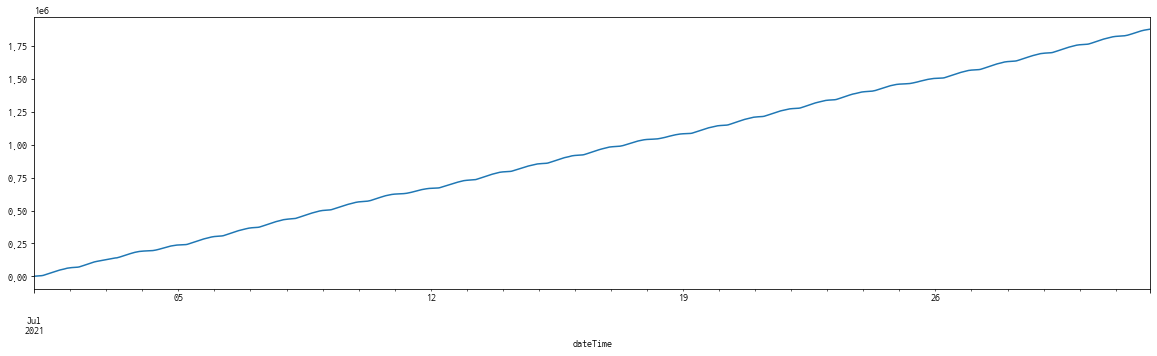

In [ ]:
rawData['vol_cum'].plot(kind='line', figsize=(20,5) )

왜 우리나라 인구수는 계속 증가하는지?
- 데이터는 해석이 매우 중요하다

#### 시간대별 증/감량?
  - 증감량을 어떻게 구해볼 수 있을까?
  - 차분(diff)

In [ ]:
rawData['vol_diff'] = rawData['vol'].diff()
rawData['vol_diff'].fillna( method = 'bfill', inplace=True)

In [ ]:
rawData['vol_diff'] = -rawData['vol_diff']   # -면 증가한것이고 +면 감소한것이기 때문에 부호 바꿔줌

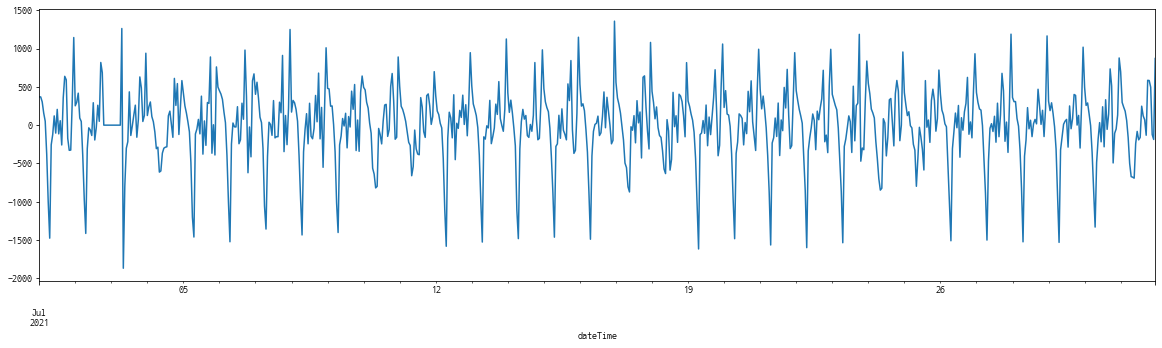

In [ ]:
rawData['vol_diff'].plot( kind='line', figsize=(20,5) )

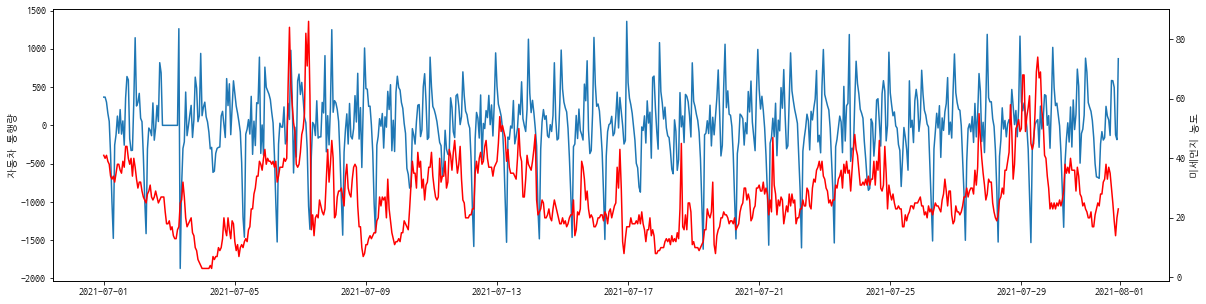

In [ ]:
plt.figure( figsize=(20,5) )
plt.plot( rawData['vol_diff'] )
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( rawData['PM10'], color='red' )
ax2.set_ylabel('미세먼지 농도')

plt.show()

In [ ]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vos_cum,vol_diff
dateTime,,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,1542.0,1542.0,1542.0,369.0
2021-07-01 01:00:00,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,1173.0,1173.0,2715.0,369.0
2021-07-01 02:00:00,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,869.0,869.0,3584.0,304.0
2021-07-01 03:00:00,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,711.0,711.0,4295.0,158.0
2021-07-01 04:00:00,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,659.0,659.0,4954.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,2456.0,2456.0,1868491.0,583.0
2021-07-31 20:00:00,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,1960.0,1960.0,1870451.0,496.0
2021-07-31 21:00:00,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,2083.0,2083.0,1872534.0,-123.0


# 유입/유출 구분

In [ ]:
rawData = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/대기오염정보/airTraffic2.csv')
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,in,out
0,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,695.0,847.0
1,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,505.0,668.0
2,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,432.0,437.0
3,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,312.0,399.0
4,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,289.0,370.0
...,...,...,...,...,...,...,...,...,...
739,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,1023.0,1433.0
740,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,776.0,1184.0
741,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,809.0,1274.0
742,07-31-23,20.0,13.0,0.041,0.012,0.4,0.003,1034.0,1236.0


## 시각화
- 유입 차량과 유출 차량의 차이를 구해서 그 차이가 미세먼지와 관계가 있는지 확인해보

In [ ]:
rawData['dateTime'] = rawData['날짜']

In [ ]:
def setDateTime( row ):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format(int(hour) - 1)
  return pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' )

rawData['dateTime'] = rawData.apply( lambda x: setDateTime(x), axis=1 )
rawData.set_index('dateTime', inplace=True)
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,in,out
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,41.0,29.0,0.011,0.038,0.5,0.003,695.0,847.0
2021-07-01 01:00:00,07-01-02,40.0,28.0,0.020,0.026,0.5,0.003,505.0,668.0
2021-07-01 02:00:00,07-01-03,41.0,28.0,0.019,0.021,0.5,0.003,432.0,437.0
2021-07-01 03:00:00,07-01-04,39.0,26.0,0.011,0.022,0.4,0.003,312.0,399.0
2021-07-01 04:00:00,07-01-05,38.0,24.0,0.016,0.016,0.4,0.003,289.0,370.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,25.0,18.0,0.046,0.015,0.3,0.004,1023.0,1433.0
2021-07-31 20:00:00,07-31-21,19.0,11.0,0.041,0.010,0.3,0.003,776.0,1184.0
2021-07-31 21:00:00,07-31-22,14.0,9.0,0.043,0.010,0.3,0.003,809.0,1274.0


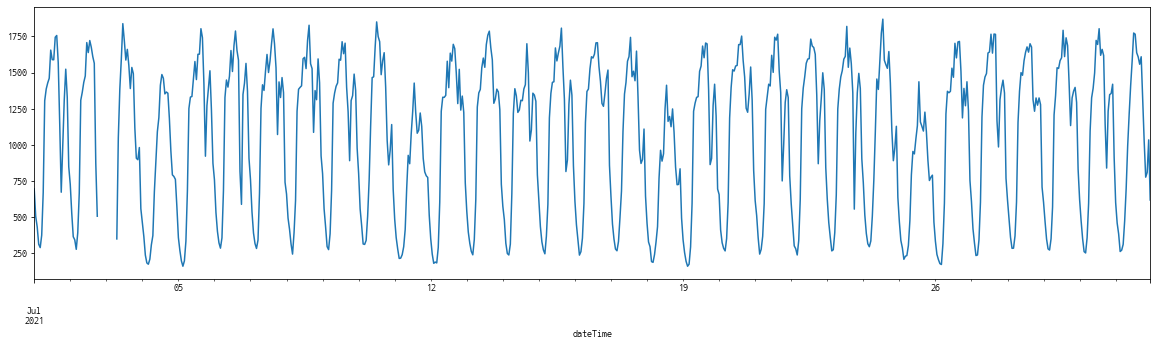

In [ ]:
rawData['in'].plot(kind='line', figsize=(20,5))

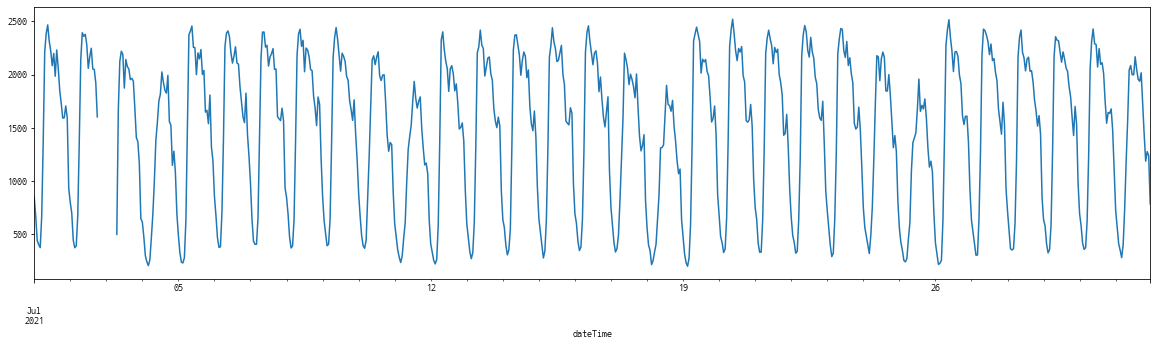

In [ ]:
rawData['out'].plot(kind='line', figsize=(20,5))

In [ ]:
rawData['diff'] = rawData['in'] - rawData['out']

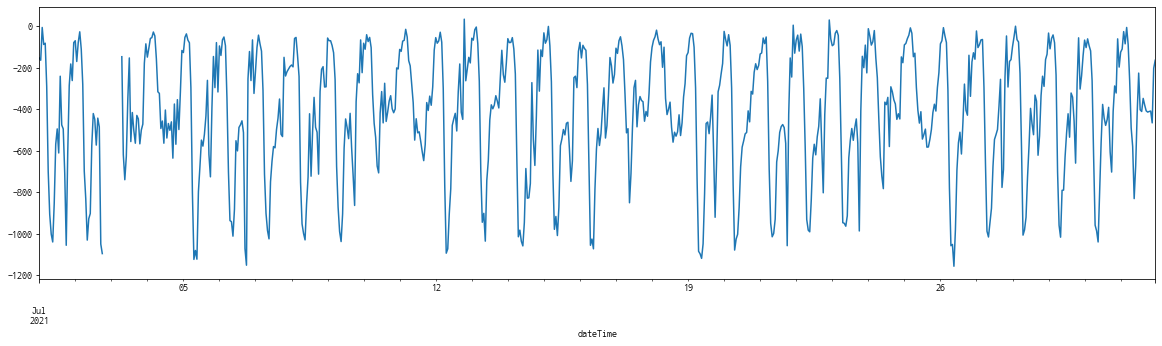

In [ ]:
rawData['diff'].plot(kind='line', figsize=(20,5))

차량의 통행량과 대기오염 사이에는 큰 관계가 없어보임
- 현재 차량의 통행량이 실시간으로 대기에 영향을 주는가?
- 현재 위치에서 발생한 매연이 현재 대기에만 영향을 주는가?
  - 현재 위치에서 발생한 매연이 다른 지역의 대기 상태에 영향을 줄 수도 있을 수 있다.
  - 다른 위치에서 발생한 매연이 현재 지역의 대기 상태에 영향을 줄 수도 있다,
- 차량의 종류마다 발생하는 매연의 양도 다름